In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def plot_wavelengths(dataframe, wavelength_range = [], labels = [], Title = []): # dataframe to be well = row, have to give wavelength actually
    wavelengths = np.asarray(dataframe.iloc[0])
    
    if len(wavelength_range) == 2:
        lower_index = np.where(wavelengths == wavelength_range[0])[0][0] # add logic if only one upper or lower limit provided auto finds missing limit
        upper_index = np.where(wavelengths == wavelength_range[1])[0][0]
        dataframe = dataframe 

        fig, ax = plt.subplots()
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                x = row[lower_index:upper_index]
            else: 
                y = row[lower_index:upper_index]
                ax.plot(x,y,label = labels[i])
        ax.legend()
        
    elif len(wavelength_range) == 1:
        wavelength = wavelength_range[0]
        index = np.where(wavelengths == wavelength)[0][0]
        wells = []
        absorbances = []
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                pass
            else:
                well = key
                wells.append(well)
                absorbance = row[index]
                absorbances.append(absorbance)

        absorbances_nm_max = [a/max(absorbances) for a in absorbances]

        plt.scatter(range(len(wells)), absorbances, s = 20, alpha = 0.5, marker = 'o', color = 'r') # in order for sample creation and analysis 
        plt.xlabel('Well Index')
        plt.ylabel('Absorbance')
    
    else:
        fig, ax = plt.subplots()
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                x = row
            else: 
                y = row
                ax.plot(x,y,label = labels[i])
#         ax.annotate('hello', xy=(1.05, 0.85), xycoords='axes fraction')   
        ax.legend()
#     text.append('Remaining component = ' + component_names[completing_component_index])
#     text_newline = '\n'.join(text) 
    plt.xlabel('Wavelength nm')
    plt.ylabel('Absorbance')

In [92]:
def plot_single_wavelength(dataframe, wavelength):
    for i, (key, row) in enumerate(dataframe.iterrows()):
        if key == 'Wavelength':
            wavelengths = row
    
    index = np.where(wavelengths == wavelength)[0][0]
    wells = []
    absorbances = []
    for i, (key, row) in enumerate(dataframe.iterrows()):
        if key == 'Wavelength':
            pass
        else:
            well = key
            wells.append(well)
            absorbance = row[index]
            absorbances.append(absorbance)

    plt.scatter(range(len(wells)), absorbances, s = 20, alpha = 0.5, marker = 'o', color = 'r') # in order for sample creation and analysis 
    plt.xlabel('Well Index')
    plt.ylabel('Absorbance')

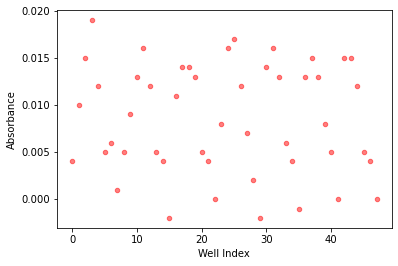

In [94]:
plot_single_wavelength(df_baseline_corrected, 400) # rearrnge x axis based on concentration or something 

In [74]:
def plot_wavelengths_zoom(dataframe, labels, x_lim = [], y_lim = []):
    """Given a dataframe with the wavelegnth information as one row will plot and will zoom based on provided axis"""
    fig, ax = plt.subplots()
    for i, (key, row) in enumerate(dataframe.iterrows()):
        if key == 'Wavelength':
            x = row
        else: 
            y = row
            ax.plot(x,y,label = labels[i])
    ax.legend()
    
    plt.xlabel('Wavelength nm')
    if len(x_lim) == 2:
        plt.xlim(x_lim)
    
    plt.ylabel('Absorbance')
    if len(y_lim) == 2:
        plt.ylim(y_lim)

In [8]:
# splitting up into dfs so can rearrange in column order
def r_to_c_order(df):    
    key = df.iloc[0]
    A = df.iloc[1:9]
    B = df.iloc[9:17]
    C = df.iloc[17:25]
    D = df.iloc[25:33]
    E = df.iloc[33:41]
    F = df.iloc[41:49]

    concat = [key]
    for i in range(8):
    #     print(A.iloc[i])
        concat.append(A.iloc[i])
        concat.append(B.iloc[i])
        concat.append(C.iloc[i])
        concat.append(D.iloc[i])
        concat.append(E.iloc[i])
        concat.append(F.iloc[i])
    

    final_df = pd.concat(concat, axis =1) # ok so now can begin to match the sample dataframe with this data frame\
    return final_df.T

In [40]:
def baseline_correction(df_samples, baseline_series): 
    """Given the series iloc of a the blank, subtracts the value at every wavelength of blank at resp. wavelength. 
    Simple subtraction blanking."""
    new_df_con = []
    for key, row in df_samples.iterrows():
        if key == 'Wavelength':
            wavelengths = row
            new_df_con.append(wavelengths)
        else: 
            series = row
#             series = (pd.to_numeric(series , errors='coerce').fillna(0)) # just know that the series is an instance so will not update df
            corrected = series.subtract(baseline_series)
            new_df_con.append(corrected)
    
    baseline_corrected_df = pd.concat(new_df_con, axis = 1).T
    baseline_corrected_df.index = df_samples[0].index
    return baseline_corrected_df

In [41]:
def remove_non_int(df):
    new_df_con = []
    for key, row in df.iterrows():
        series = row
        series = (pd.to_numeric(series , errors='coerce').fillna(0)) # just know that the series is an instance so will not update df
        new_df_con.append(series)
    df_removed_non_int = pd.concat(new_df_con, axis = 1)
    return df_removed_non_int.T

In [42]:
def piece_together(first_slice, second_slice):
    """Useful to create a dataframe as the graphing functions require the wavelength information to be frist series in a df"""
    new_df = pd.concat([first_slice, second_slice])
    return new_df

def slice_df(df, n):
    new_df_con = [] 
    for i, (key, row) in enumerate(df.iterrows()):
        series = row
        if i % n == 0:
            new_df_con.append(series)
    new_df = pd.concat(new_df_con, axis = 1)
    return new_df.T

def slice_remove_df(df, n):
    new_df_con = [] 
    for i, (key, row) in enumerate(df.iterrows()):
        series = row
        if i % n == 0:
            pass
        else:
            new_df_con.append(series)
    new_df = pd.concat(new_df_con, axis = 1)
    return new_df.T

In [37]:
# Inputs for functions should be specified, are there a dataframe or a series or a group of series 

In [78]:
df =  pd.read_excel(r"C:\Users\Edwin\Desktop\10_28_20.xlsx", sheet_name = 'Sheet1' ).T

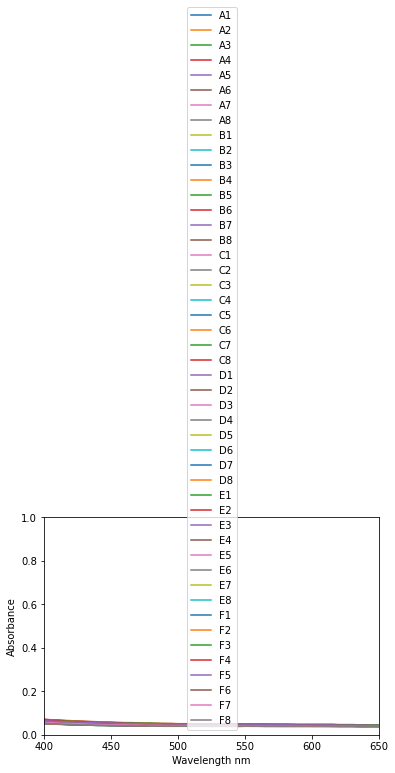

In [79]:
plot_wavelengths_zoom(df, list(df[0].index), x_lim=[400,650], y_lim=[0,1])

In [ ]:
df_baseline_corrected = baseline_correction(df, df.iloc[-1])
plot_wavelengths_zoom(df_baseline_corrected, list(df_baseline_corrected[0].index), x_lim=[500, 700], y_lim=[0,0.015])

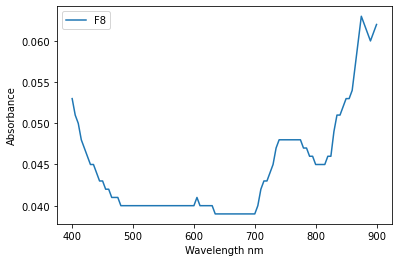

In [75]:
wavelegnth_df = df[0:1]
solo_baseline_df = df[-1:]
baseline_df = piece_together(wavelegnth_df, solo_baseline_df)
plot_wavelengths_zoom(baseline_df, list(baseline_df[0].index))